In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Salary_Dataset_with_Extra_Features.csv")

In [4]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [5]:
df=df[["Company Name","Location","Employment Status","Salary"]]

In [6]:
df.head()

,Company Name,Location,Employment Status,Salary
0,Sasken,Bangalore,Full Time,400000
1,Advanced Millennium Technologies,Bangalore,Full Time,400000
2,Unacademy,Bangalore,Full Time,1000000
3,SnapBizz Cloudtech,Bangalore,Full Time,300000
4,Appoids Tech Solutions,Bangalore,Full Time,600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company Name       22770 non-null  object
 1   Location           22770 non-null  object
 2   Employment Status  22770 non-null  object
 3   Salary             22770 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 711.7+ KB


In [8]:
df=df[df["Salary"].notnull()]

In [9]:
df.head()

,Company Name,Location,Employment Status,Salary
0,Sasken,Bangalore,Full Time,400000
1,Advanced Millennium Technologies,Bangalore,Full Time,400000
2,Unacademy,Bangalore,Full Time,1000000
3,SnapBizz Cloudtech,Bangalore,Full Time,300000
4,Appoids Tech Solutions,Bangalore,Full Time,600000


In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Company Name         0
Location             0
Employment Status    0
Salary               0
dtype: int64

In [14]:
df=df.drop("Employment Status",axis=1)


In [15]:
df.head()

,Company Name,Location,Salary
0,Sasken,Bangalore,400000
1,Advanced Millennium Technologies,Bangalore,400000
2,Unacademy,Bangalore,1000000
3,SnapBizz Cloudtech,Bangalore,300000
4,Appoids Tech Solutions,Bangalore,600000


In [17]:
df['Location'].value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

In [20]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]='Other'
            return categorical_map

In [21]:
location_map=shorten_categories(df.Location.value_counts(),150)
df['Location']=df['Location'].map(location_map)
df.Location.value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Other              108
Name: Location, dtype: int64

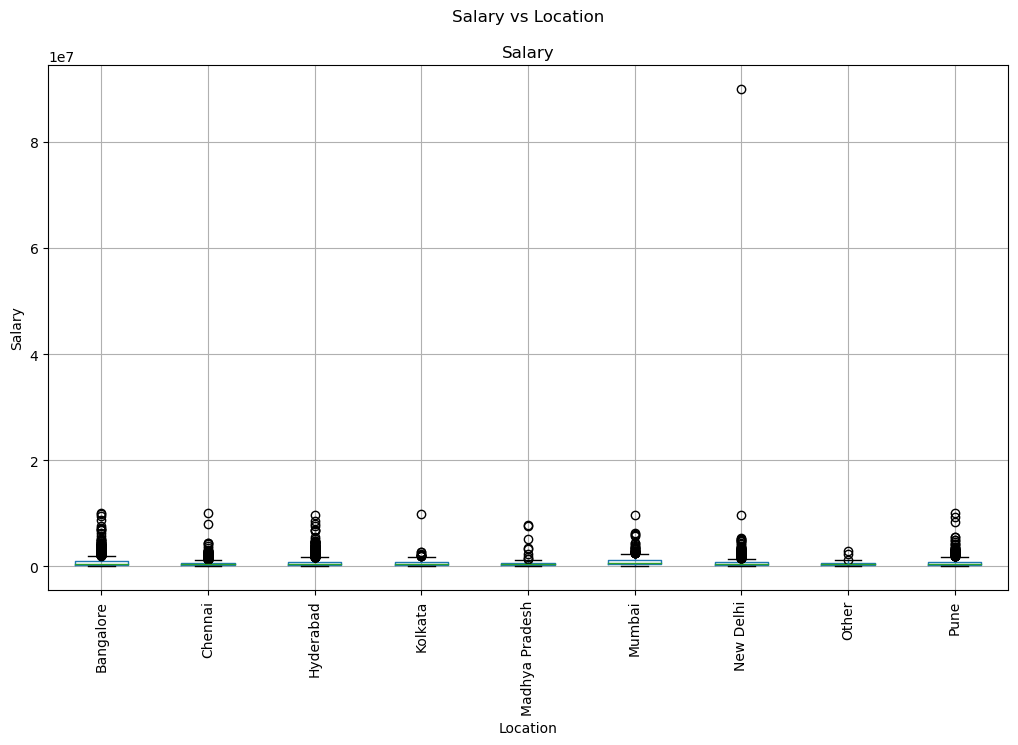

In [24]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Location',ax=ax)
plt.suptitle('Salary vs Location')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [28]:
df['Company Name'].value_counts()

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
Talent Anywhere                     1
WisdmLabs                           1
Softdel                             1
Dentsu                              1
Nextgen Innovation Labs             1
Name: Company Name, Length: 11261, dtype: int64

In [128]:
df["Company Name"].unique()

array([8130,  417, 9778, ..., 9792, 3142, 6373])

In [129]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
df["Company Name"]=le_location.fit_transform(df["Company Name"])
df["Company Name"].unique()

array([8130,  417, 9778, ..., 9792, 3142, 6373])

In [130]:
le_location=LabelEncoder()
df["Location"]=le_location.fit_transform(df["Location"])
df["Location"].unique()

array([0, 1, 2, 6, 8, 9, 7, 3, 4, 5])

In [131]:
x=df.drop("Salary",axis=1)
y=df["Salary"]

In [132]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x,y.values)

LinearRegression()

In [133]:
y_predict=linear_reg.predict(x)

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error=np.sqrt(mean_squared_error(y,y_predict))

In [135]:
error

884300.637213902

In [136]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [137]:
y_predict=dec_tree_reg.predict(x)

In [138]:
error=np.sqrt(mean_squared_error(y,y_predict))
error

392358.3701584849

In [139]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y.values)

RandomForestRegressor(random_state=0)

In [140]:
y_predict=random_forest_reg.predict(x)

In [141]:
error=np.sqrt(mean_squared_error(y,y_predict))
error

501345.4413015393

In [142]:
x

,Company Name,Location
0,8130,0
1,417,0
2,9778,0
3,8534,0
4,884,0
...,...,...
22765,3142,0
22766,6373,0
22767,3444,0
22768,313,0


In [143]:
y

0         400000
1         400000
2        1000000
3         300000
4         600000
          ...   
22765     200000
22766     300000
22767     192000
22768     300000
22769     300000
Name: Salary, Length: 22770, dtype: int64

In [144]:
x

,Company Name,Location
0,8130,0
1,417,0
2,9778,0
3,8534,0
4,884,0
...,...,...
22765,3142,0
22766,6373,0
22767,3444,0
22768,313,0


In [159]:
x=np.array([["Unacademy","Bangalore"]])
x

array([['Unacademy', 'Bangalore']], dtype='<U9')

In [160]:
x[:,0]=le_company.fit_transform(x[:,0])
x[:,1]=le_location.fit_transform(x[:,1])
x


array([['0', '0']], dtype='<U9')

In [161]:
y_pred=regressor.predict(x)
y_pred

NameError: name 'regressor' is not defined